# DOMAIN: Healthcare

# CONTEXT: 
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results. 

# DATA DESCRIPTION: 
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle 
4. S_slope
5. P_radius 
6. S_degree
7. Class

# PROJECT OBJECTIVE: 
Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

Steps and tasks:
## 1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.
## 2. Data cleansing:
• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.
## 3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
## 4. Data pre-processing:
• Segregate predictors vs target attributes

• Perform normalisation or scaling if required.

• Check for target balancing. Add your comments.

• Perform train-test split.
## 5. Model training, testing and tuning:
• Design and train a KNN classifier.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Automate the task of finding best values of K for KNN.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 
## 6. Conclusion and improvisation:
• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

# Solution:

Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Import and warehouse data:

1. a. Import all the given datasets and explore shape and size of each.

In [2]:
df1=pd.read_csv("Part1 - Normal.csv")
df2=pd.read_csv("Part1 - Type_H.csv")
df3=pd.read_csv("Part1 - Type_S.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


1. b. Merge all datasets onto one and explore final shape and size.

In [6]:
df=pd.concat([df1,df2,df3],ignore_index=True)
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### 2. Data cleansing:

2. a. Explore and if required correct the datatypes of each attribute

In [8]:
import re
def conv_class(txt):
    x = re.findall("[l,L]$", txt)
    y = re.findall("[H,h]$",txt)
    z = re.findall("[S,s]$",txt)
    if x:
        return str("Normal")
    elif y:
        return str("Type_H")
    elif z:
        return str("Type_S")
    else:
        return str("aiden pearce")
    
df.Class=df.Class.apply(conv_class)

Here, we have converted the class column using regex.

2. b. Explore for null values in the attributes and if required drop or impute values.

In [9]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

There are no null values in the dataset.

### 3. Data analysis & visualisation:

3. a. Perform detailed statistical analysis on the data.

In [10]:
df.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


Here, the describe function gives us various statistcal insights in out data.

3. b.  Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

Univariate analysis

C:\Users\ac253\AppData\Local\Temp\ipykernel_37200\366361403.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.P_incidence)


<AxesSubplot:xlabel='P_incidence', ylabel='Density'>

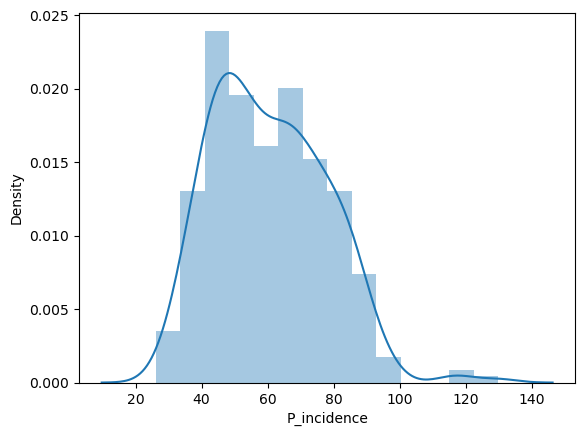

In [11]:
sns.distplot(df.P_incidence)

C:\Users\ac253\AppData\Local\Temp\ipykernel_37200\1655556518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.P_tilt)


<AxesSubplot:xlabel='P_tilt', ylabel='Density'>

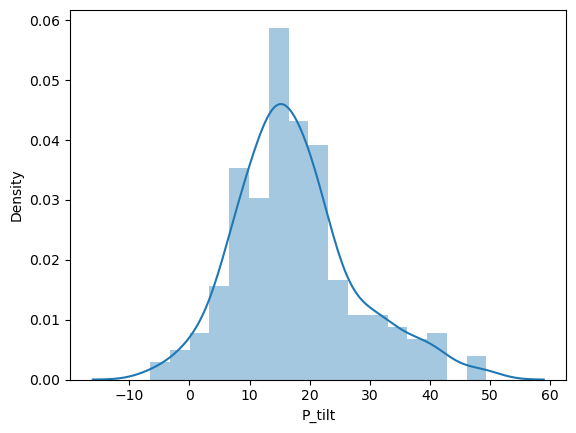

In [12]:
sns.distplot(df.P_tilt)

C:\Users\ac253\AppData\Local\Temp\ipykernel_37200\1351635061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.L_angle)


<AxesSubplot:xlabel='L_angle', ylabel='Density'>

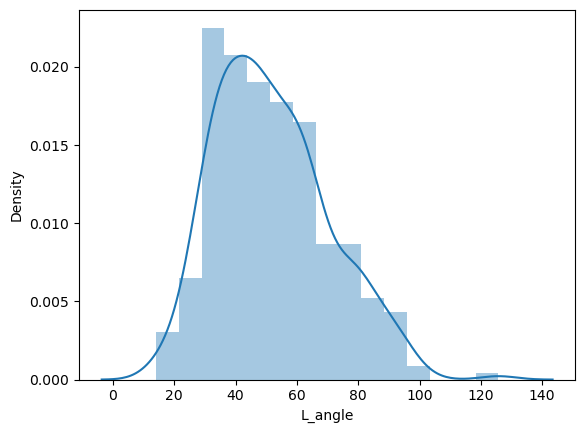

In [13]:
sns.distplot(df.L_angle)

C:\Users\ac253\AppData\Local\Temp\ipykernel_37200\1454523651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.S_slope)


<AxesSubplot:xlabel='S_slope', ylabel='Density'>

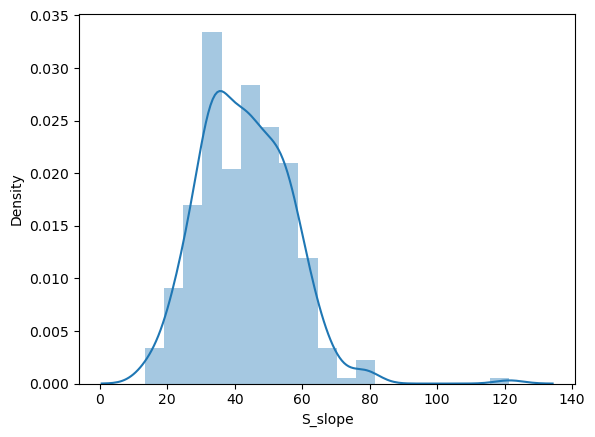

In [14]:
sns.distplot(df.S_slope)

C:\Users\ac253\AppData\Local\Temp\ipykernel_37200\3242642330.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.P_radius)


<AxesSubplot:xlabel='P_radius', ylabel='Density'>

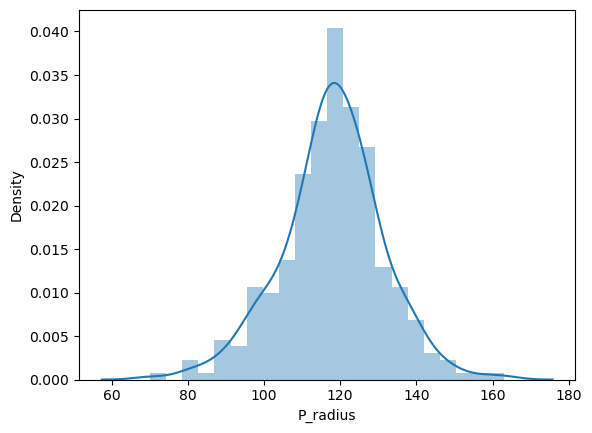

In [15]:
sns.distplot(df.P_radius)

C:\Users\ac253\AppData\Local\Temp\ipykernel_37200\1779020848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.S_Degree)


<AxesSubplot:xlabel='S_Degree', ylabel='Density'>

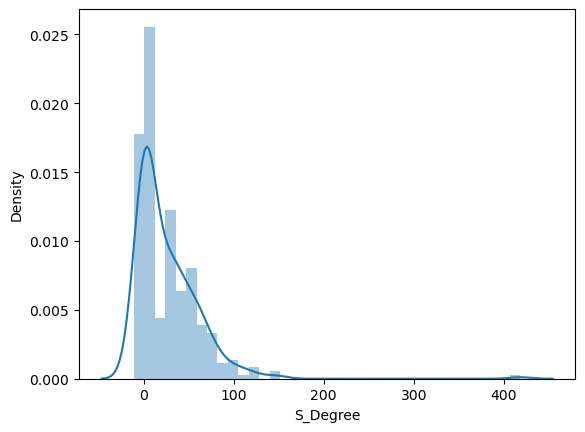

In [16]:
sns.distplot(df.S_Degree)

<AxesSubplot:xlabel='Class', ylabel='count'>

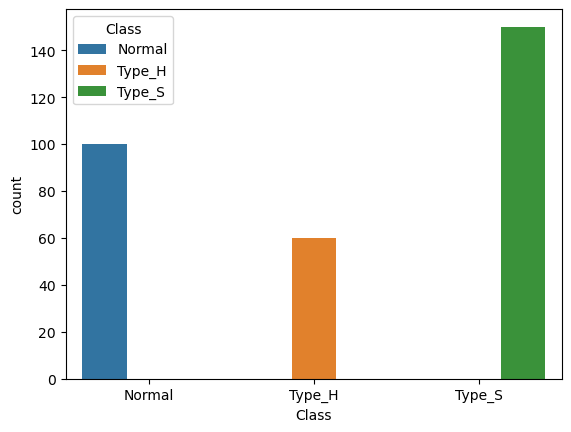

In [17]:
sns.countplot(x= df.Class, hue = df.Class)

Bivariate analysis

<AxesSubplot:xlabel='P_incidence', ylabel='P_tilt'>

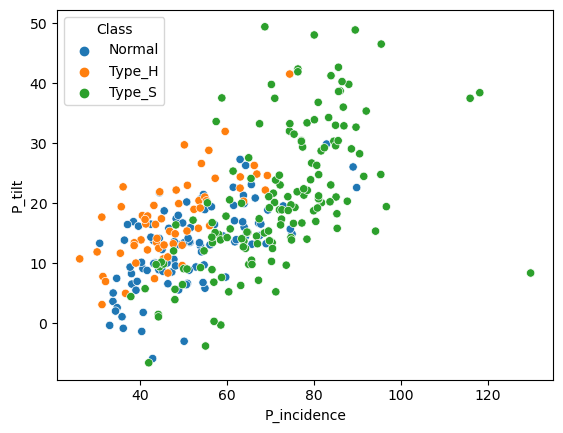

In [18]:
sns.scatterplot(x=df.P_incidence, y = df.P_tilt , hue = df.Class)           

<AxesSubplot:xlabel='P_incidence', ylabel='L_angle'>

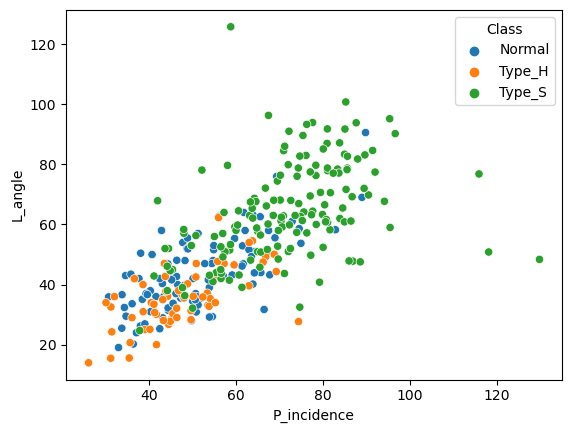

In [19]:
sns.scatterplot(x=df.P_incidence, y = df.L_angle , hue = df.Class)

<AxesSubplot:xlabel='P_incidence', ylabel='S_slope'>

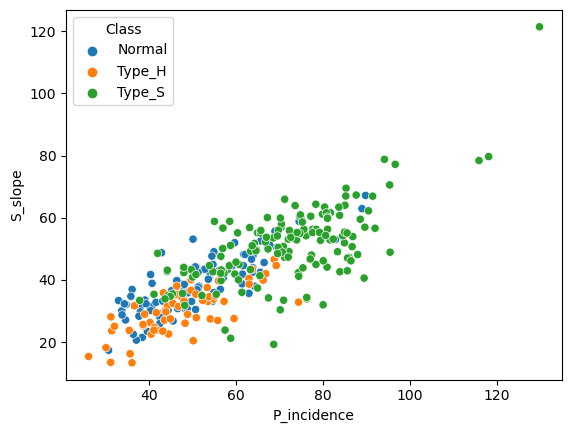

In [20]:
sns.scatterplot(x=df.P_incidence, y = df.S_slope , hue = df.Class)

<AxesSubplot:xlabel='P_incidence', ylabel='P_radius'>

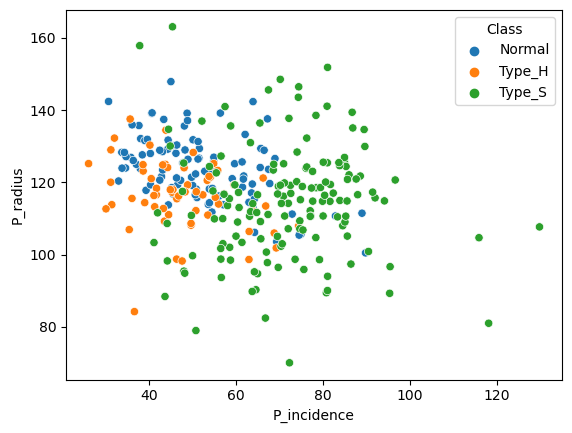

In [21]:
sns.scatterplot(x=df.P_incidence, y = df.P_radius , hue = df.Class)

<AxesSubplot:xlabel='P_incidence', ylabel='S_Degree'>

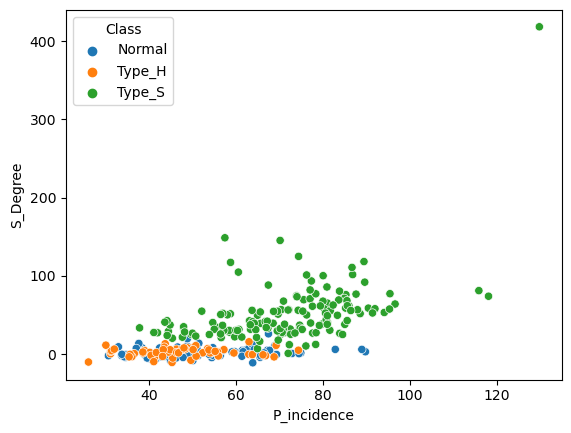

In [22]:
sns.scatterplot(x=df.P_incidence, y = df.S_Degree , hue = df.Class)

<AxesSubplot:xlabel='P_tilt', ylabel='L_angle'>

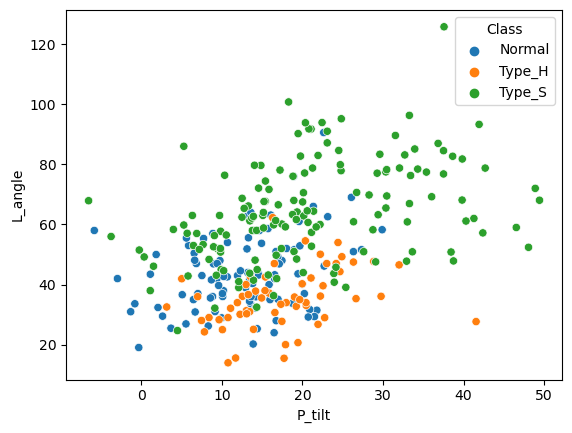

In [23]:
sns.scatterplot(x=df.P_tilt, y = df.L_angle , hue = df.Class)

<AxesSubplot:xlabel='P_tilt', ylabel='S_slope'>

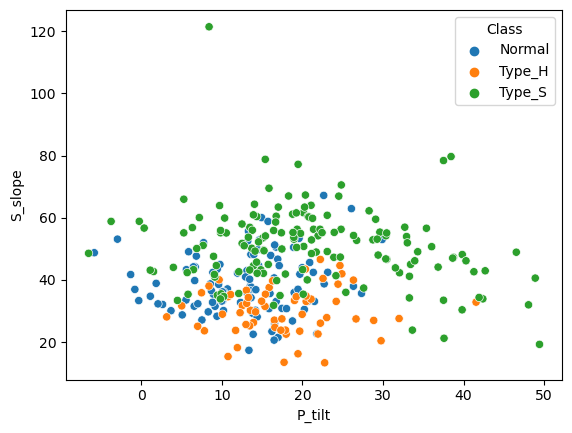

In [24]:
sns.scatterplot(x=df.P_tilt, y = df.S_slope , hue = df.Class)

<AxesSubplot:xlabel='P_tilt', ylabel='P_radius'>

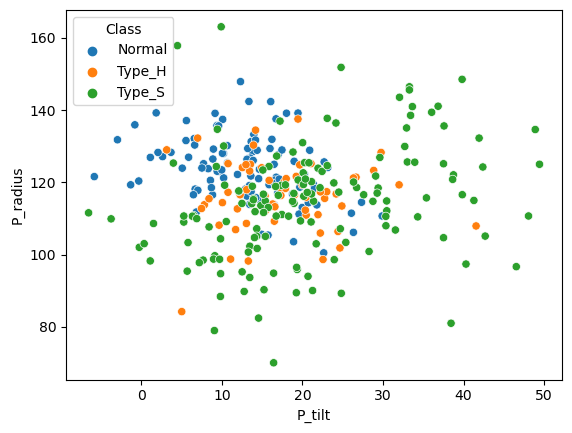

In [25]:
sns.scatterplot(x=df.P_tilt, y = df.P_radius , hue = df.Class)

<AxesSubplot:xlabel='P_tilt', ylabel='S_Degree'>

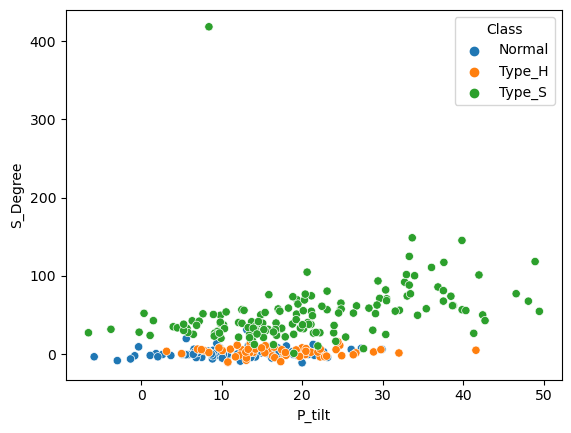

In [26]:
sns.scatterplot(x=df.P_tilt, y = df.S_Degree , hue = df.Class)

<AxesSubplot:xlabel='L_angle', ylabel='S_slope'>

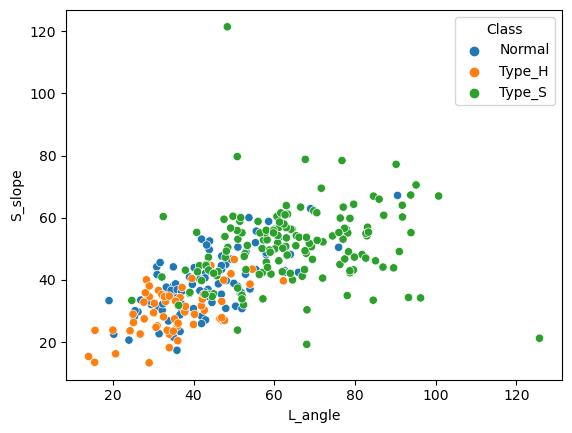

In [27]:
sns.scatterplot(x=df.L_angle, y = df.S_slope , hue = df.Class)

<AxesSubplot:xlabel='L_angle', ylabel='P_radius'>

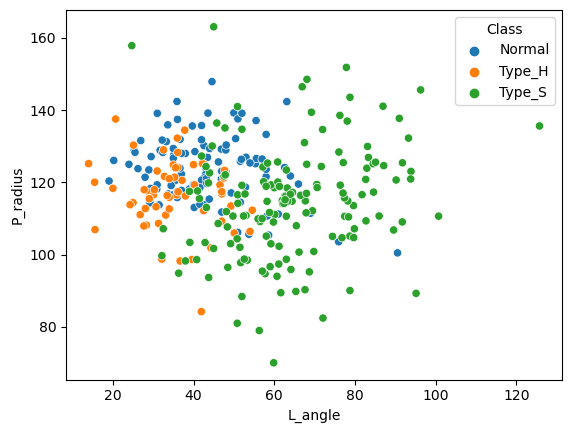

In [28]:
sns.scatterplot(x=df.L_angle, y = df.P_radius , hue = df.Class)

<AxesSubplot:xlabel='L_angle', ylabel='S_Degree'>

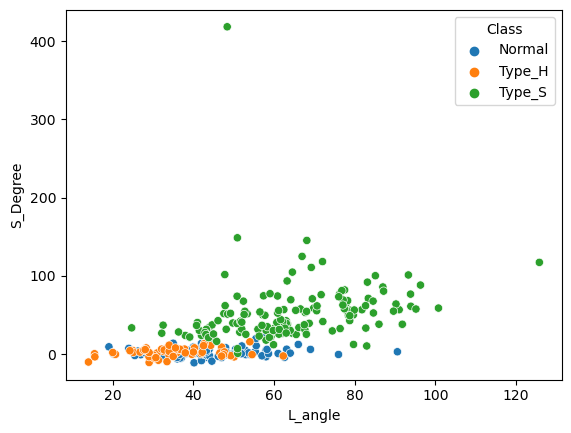

In [29]:
sns.scatterplot(x=df.L_angle, y = df.S_Degree , hue = df.Class)

<AxesSubplot:xlabel='S_slope', ylabel='S_Degree'>

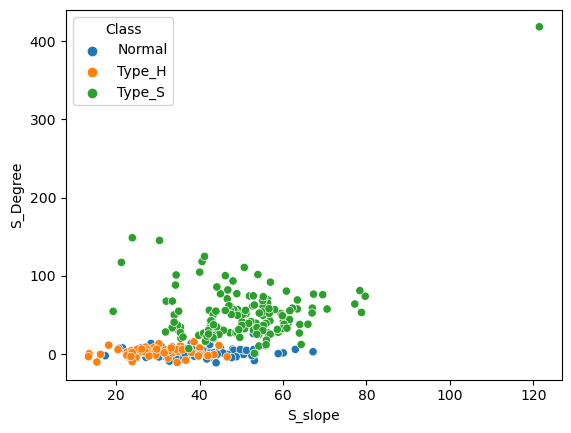

In [30]:
sns.scatterplot(x=df.S_slope, y = df.S_Degree , hue = df.Class)

<AxesSubplot:xlabel='S_slope', ylabel='P_radius'>

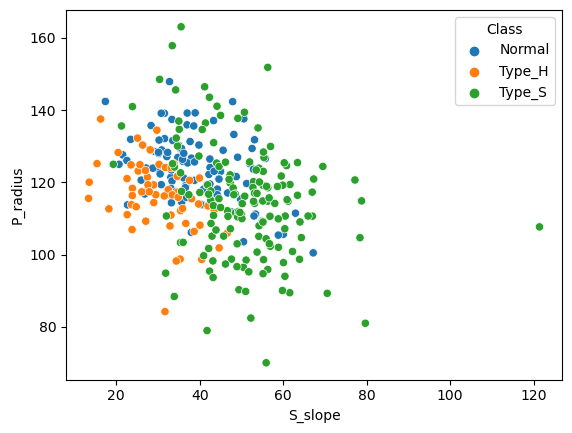

In [31]:
sns.scatterplot(x=df.S_slope, y = df.P_radius , hue = df.Class)

<AxesSubplot:xlabel='P_radius', ylabel='S_Degree'>

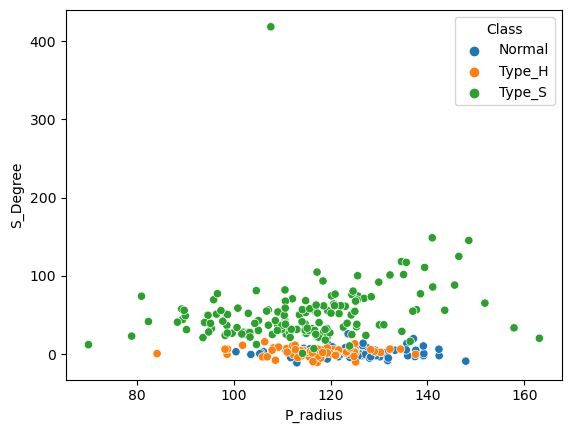

In [32]:
sns.scatterplot(x=df.P_radius, y = df.S_Degree , hue = df.Class)

multivariate analysis

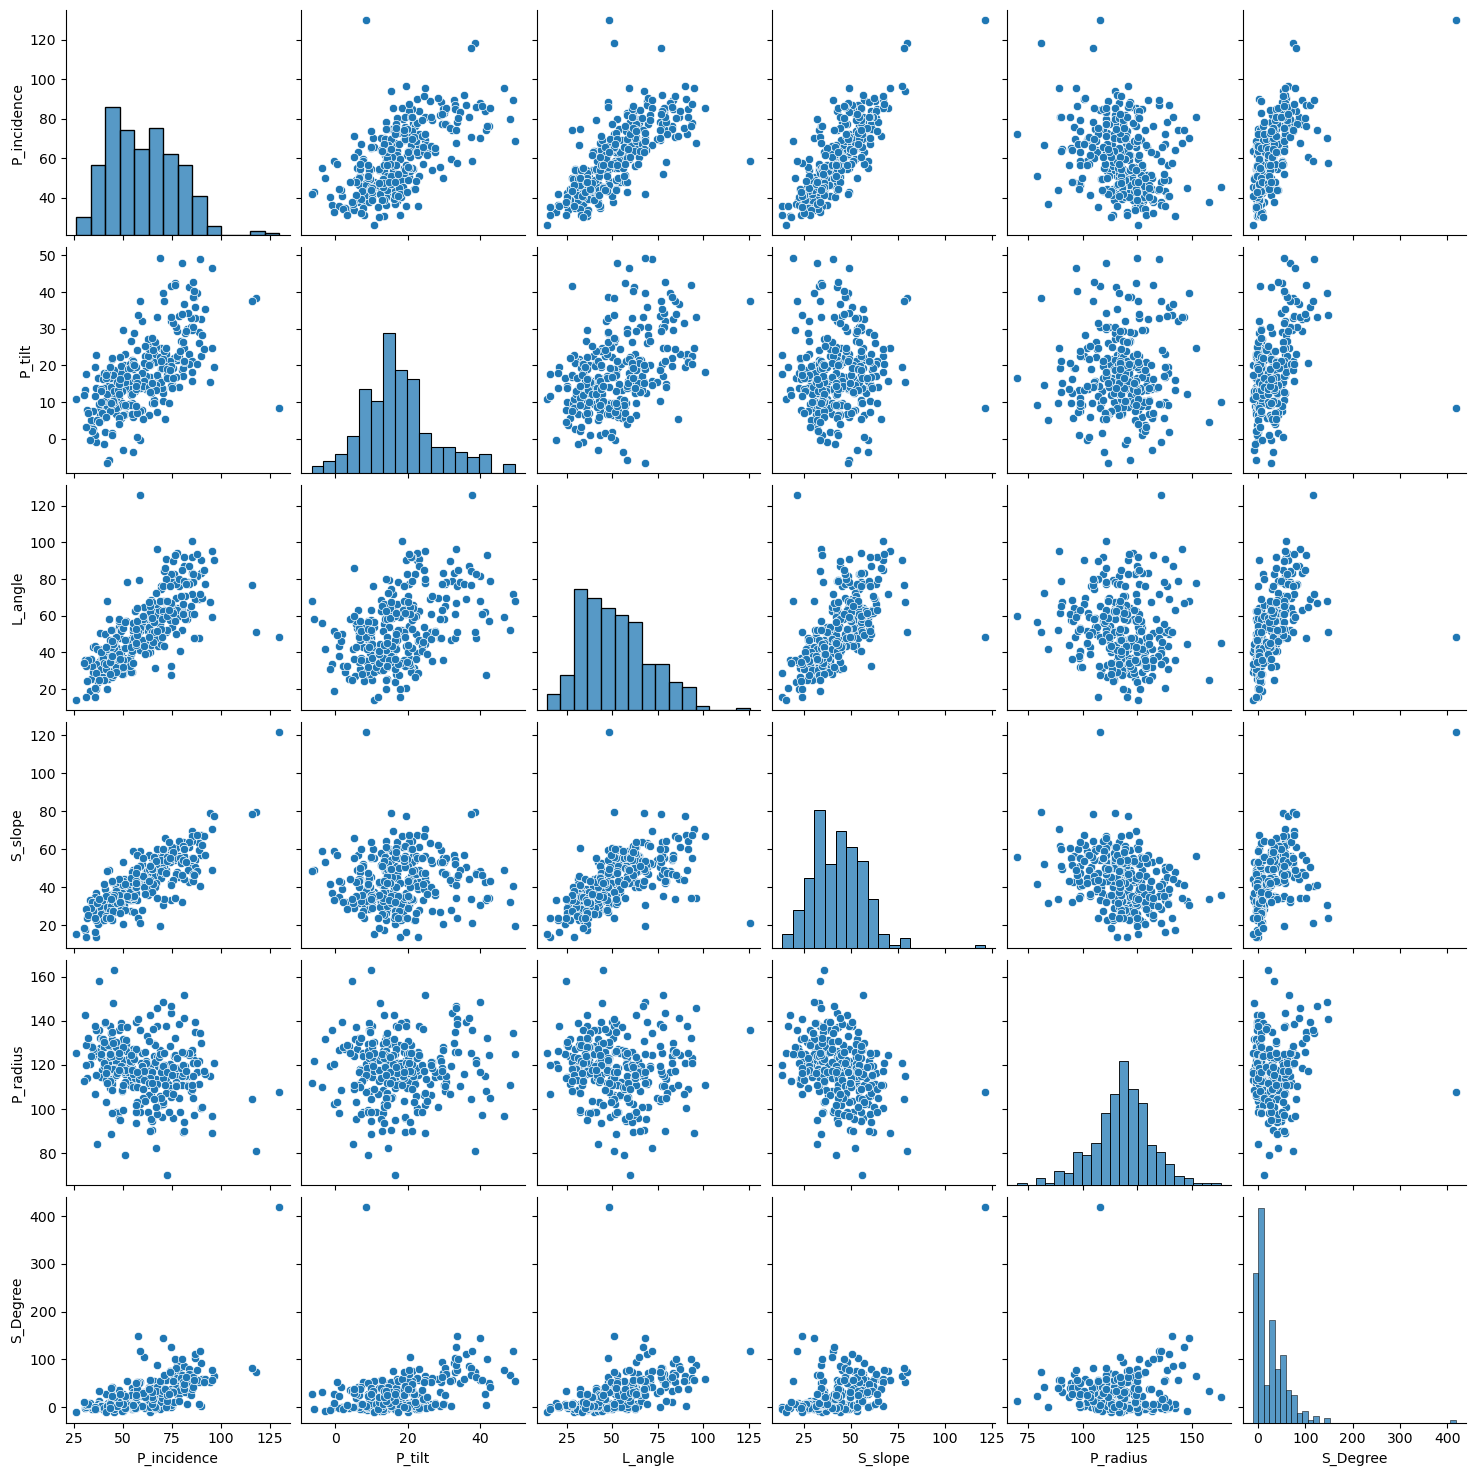

In [33]:
sns.pairplot(df)

<AxesSubplot:>

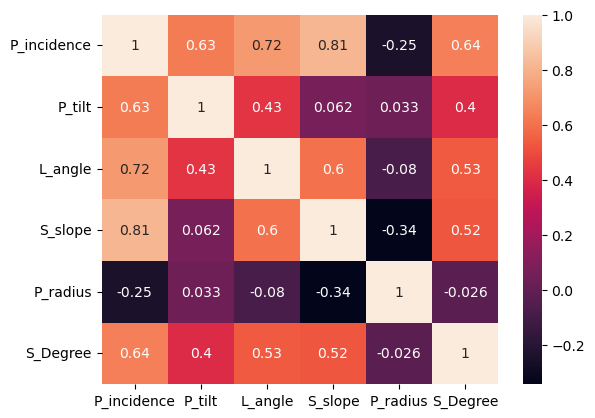

In [34]:
cor = df.corr()
sns.heatmap(cor,  annot=True)

### 4. Data pre-processing:

4. a. Segregate predictors vs target attributes

In [35]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Class"]=le.fit_transform(df.Class)

In [36]:
X=df.drop('Class',axis =1)
Y = df.Class

predictor and target attributes are segregated

4. b. Perform normalisation or scaling if required.

The ranges of the predictor attributes are not similar.
Hence we have to do normalisation of the data.

In [37]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

4. c. Check for target balancing. Add your comments.

<AxesSubplot:xlabel='Class', ylabel='count'>

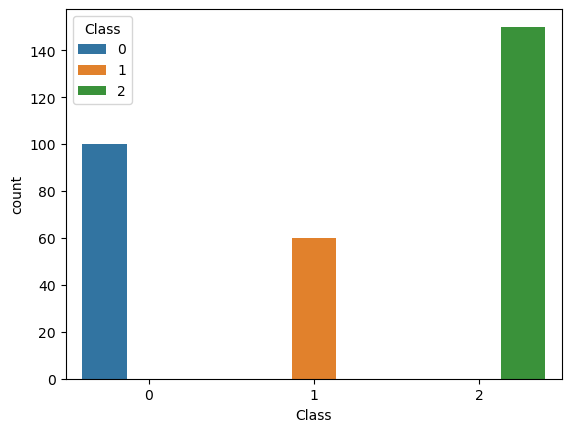

In [38]:
sns.countplot(x= df.Class, hue = df.Class)

Here in the df dataframe we have 60 samples with class as Type_H, 100 samples with class as Normal, 150 samples with class as type_S.

Since, the class type Type_S has almost thrice the amount of samples as that of Type_H, we need to perform target balancing.

In the dataset, number of samples is just 310. We cannot drop useful data samples. Thus, Random under-sampling is ruled out. 

Random over-sampling is also not a good option, as we risk overfitting the dataset.

*Synthetic Minority Oversampling Technique* is used since it prevents overrfitting and no useful information is lost.

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_sample(X_norm, Y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print(X_res.shape)
print(Y_res.shape)
sns.countplot(x= Y_res, hue = Y_res)

The number of samples from our dataset have incresed from 310 to 450 after target balancing.

4. d.  Perform train-test split.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res , test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

### 5. Model training, testing and tuning:

5. a. Design and train a KNN classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn= KNeighborsClassifier(n_neighbors = 25)

knn.fit(X_train,Y_train)

5. b. Display the classification accuracies for train and test data.

In [ ]:
Y_pred= knn.predict(X_train)

print("train accuracy : " , accuracy_score(Y_train,Y_pred) )

Y_pred= knn.predict(X_test)

print("test accuracy : " , accuracy_score(Y_test,Y_pred) )

5. c.  Display and explain the classification report in detail.

In [ ]:
from sklearn.metrics import classification_report

sns.countplot(x= Y_pred, hue = Y_pred)
print(pd.Series(Y_pred).value_counts())

print(classification_report(Y_test,Y_pred))

The classifier made a total of 90 predictions.

Out of the 90 predictions, 28 are classified as normal, 33 are classified as Type_H and 28 are classified as Type_S.

In reality, the test dataset contains 25,29 and 36 samples of Normal, Type_H and Type_S respectively.  

5. d. Automate the task of finding best values of K for KNN.

5. e. Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 

In [ ]:
from sklearn.model_selection import cross_val_score

neighbours=[]
cv_scores=[]

for k in range(1,100,2):
    neighbours.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,Y, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores)

In [ ]:
MSE = [1 - x for x in  cv_scores]

# determining best k using cross validation
optimal_k = neighbours[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbours, MSE)

The best score is obtained when the number of neighbours is 25.
Hence, we have selected the number of neighbours as 25.

# 6. Conclusion and improvisation:

After the implementation and the execution of the created machine learning model using the “K-Nearest Neighbor Classifier algorithm” it could be clearly revealed that the predicted model for the given dataset gives the best accuracy score as 84.44%.

When applying the KNN classifier it offered various scores for the accuracy when the number of neighbors varied. The model gave this decent accuracy score when the optimal numbers of neighbors were 25, where the model was tested with the values in the range from 1 to 100 as the value of “K” or the number of neighbors.

To select the best tuning parameter in this model applied 10 fold cross-validation for testing. From that experimental result, it observed that to classify whether the patient's class is normal, type_H or type_S accurately.

Furthermore, in the data exploration section with descriptive statistics of the data set and visualization tasks revealed a better idea of the data set before the prediction.

Moreover, the classification report in the evaluation section clearly represented the accuracy scores and visualizations in detail for the predicted model.

In future the data should include:

• more biomechanics features

• more samples in the dataset

• collect data samples such that target attribute has approximately equal number of unique samples.

• any other parameter of the patient like age or medical history